# Concrete-Filled Steel Tube (CFST) Section Meshing

In [1]:
import numpy as np
import openseespy.opensees as ops
import opstool as opst
import matplotlib.pyplot as plt

The following materials are intended for the purpose of calculating section properties and are not related to OpenSeesPy.

In [2]:
Ec = 3.45e7
Es = 2.0e8
Nus = 0.3
Nuc = 0.2
tube_d = 0.05
steel_mat = opst.pre.section.create_material(
    name="steel", elastic_modulus=Es, poissons_ratio=Nus
)
conc_mat = opst.pre.section.create_material(
    name="conc", elastic_modulus=Ec, poissons_ratio=Nuc
)

In [4]:
all_ = opst.pre.section.create_circle_patch(xo=[0, 0], radius=0.75, n_sub=30)
conc_geo = opst.pre.section.create_circle_patch(
    xo=[0, 0], radius=0.75 - tube_d, n_sub=30
)
tube_geo = all_ - conc
opst.pre.section.set_patch_material([conc_geo, tube_geo], [conc_mat, steel_mat])

In [5]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group(dict(tube=tube_geo, conc=conc_geo))
SEC_MESH.set_mesh_size(dict(tube=0.1, conc=0.1))
SEC_MESH.set_mesh_color(dict(tube="#ffa756", conc="#40a368"))
SEC_MESH.set_ops_mat_tag(dict(tube=1, conc=2))
SEC_MESH.mesh()

OPSTOOL :: The section My Section has been successfully meshed!

In [6]:
SEC_MESH.centring()
props = SEC_MESH.get_sec_props(display_results=True)

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 9.794E+07              │ Cross-sectional area                   │
│ Asy       │ 7.468E+07              │ Shear area y-axis                      │
│ Asz       │ 7.468E+07              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.822E+07              │ Moment of inertia y-axis               │
│ Iz        │ 1.822E+07              │ Moment of inertia z-axis               │
│ Iyz       │ -1.073E-09             │ Product of inertia                     │
│ Wyt       │ 2.443E+07              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 2.443E+07              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 2.430E+07              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 2.430E+07              │ Section moduli of bottom fibres z-axis │
│ J         │ 3.642E+07              │ Torsion constant                       │
│ phi       │ -9.000E+01             │ Principal axis angle                   │
│ mass      │ 1.754E+00              │ Section mass                           │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

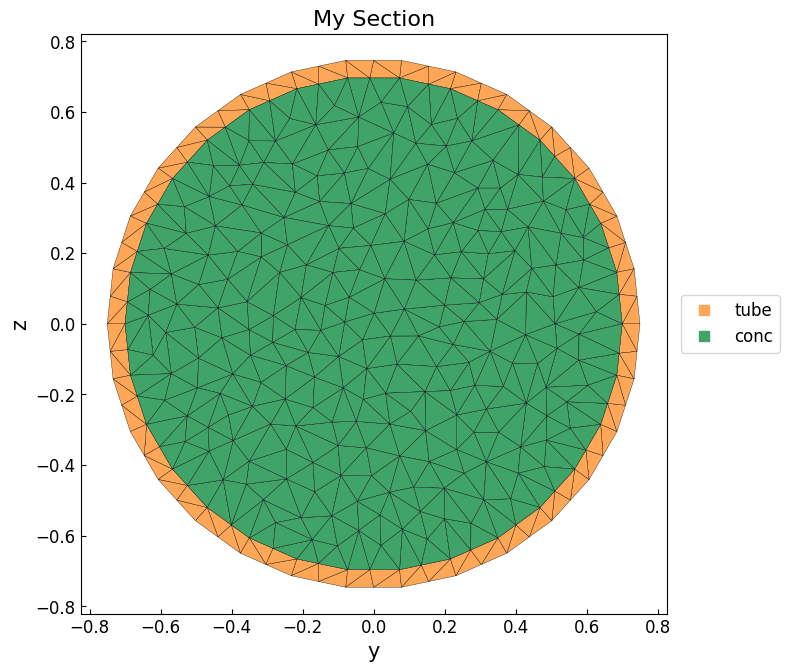

In [7]:
SEC_MESH.view(fill=True, show_legend=True)